In [7]:
# # Convert markus to grayscale image
# from PIL import Image
# img = Image.open('marcus3.jpg').convert('L')
# img.save('markus_gray.jpg')

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patheffects as PathEffects
import numpy as np

In [2]:
img = mpimg.imread('markus_gray_scaled.jpg')

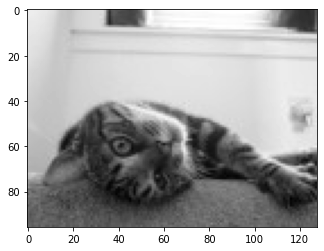

In [3]:
plt.imshow(img, cmap='gray')

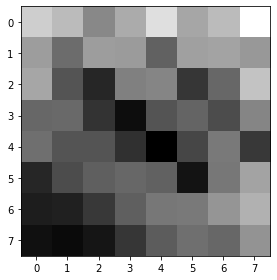

In [57]:
row_offset = 50
col_offset = 50
plt.imshow(img[row_offset:row_offset+8, col_offset:col_offset+8], cmap='gray')
# plt.xticks(np.arange(0, 32, 1));
# plt.yticks(np.arange(0, 32, 1));
# plt.grid(color='w', linestyle='-', linewidth=0.1)
plt.tight_layout()

In [58]:
zoomed = img[row_offset:row_offset+8, col_offset:col_offset+8]

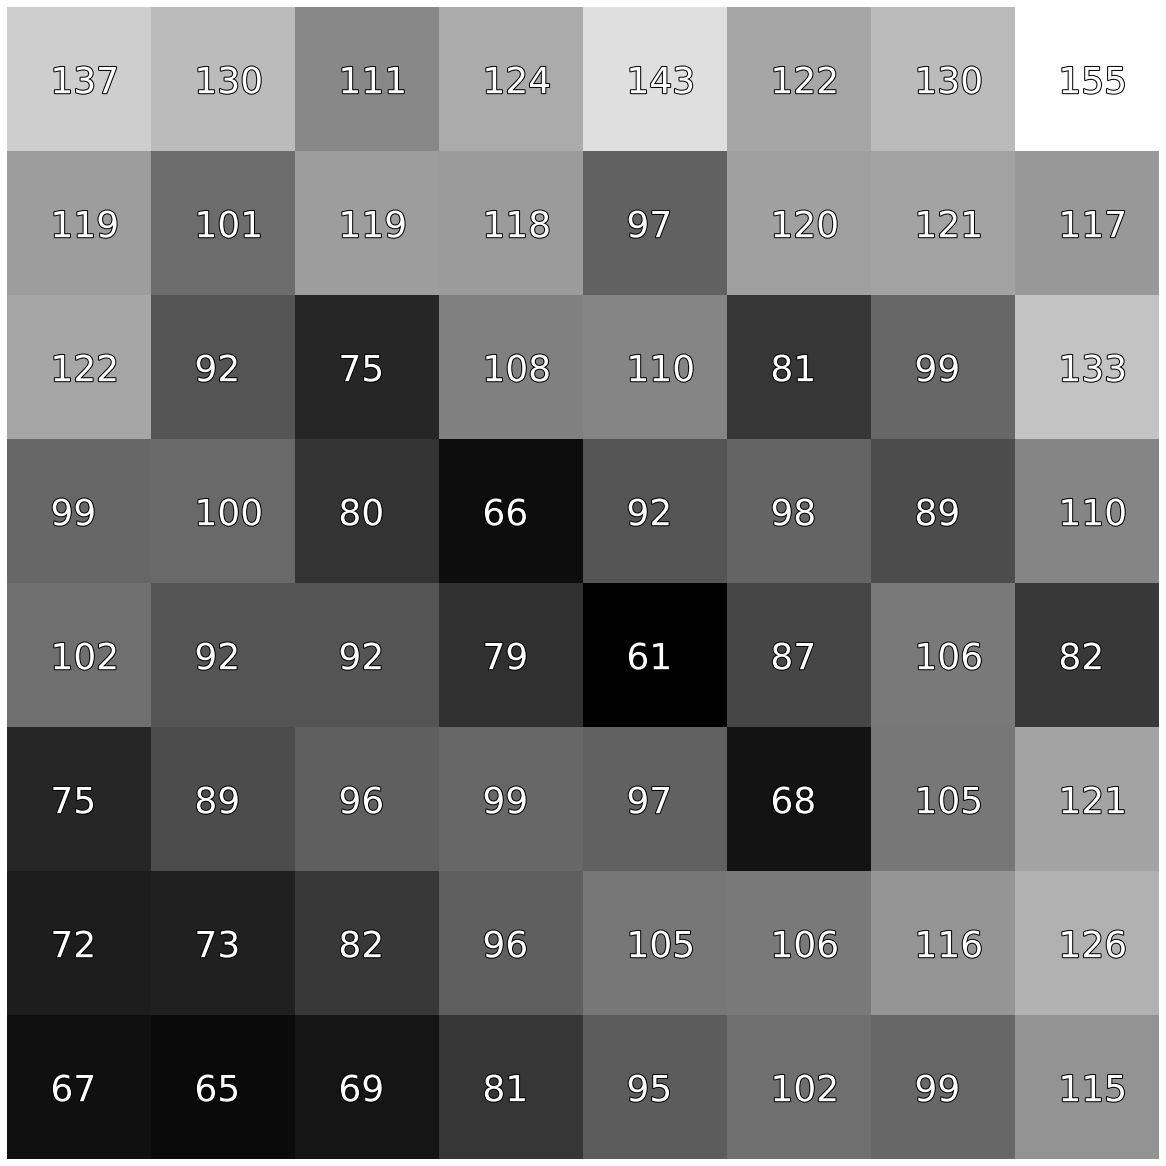

In [59]:
fig = plt.figure(figsize=(16,16), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(zoomed, cmap='gray')
for y in np.arange(zoomed.shape[0]):
    for x in np.arange(zoomed.shape[1]):
        txt = plt.text(x-0.2,y+0.1,f'{zoomed[y,x]}', size=36, color='white')
        txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='k')])
# plt.tight_layout()
plt.savefig('markus_zoom.png')

In [144]:
import torch

In [157]:
conv_layer = torch.nn.Conv2d(1,4,(3,3))

In [162]:
img_tensor = torch.tensor(img, dtype=torch.float).unsqueeze(0).unsqueeze(0)

In [160]:
img_tensor

tensor([[[[238, 238, 238,  ...,  64,  63,  93],
          [238, 238, 238,  ...,  63,  62,  92],
          [238, 238, 237,  ...,  62,  62,  94],
          ...,
          [105, 103,  97,  ..., 102, 106, 101],
          [106, 109, 104,  ..., 107, 103, 105],
          [111, 110, 100,  ..., 107, 102,  97]]]], dtype=torch.uint8)

In [164]:
conv_output = conv_layer(img_tensor)

In [168]:
convolutions = conv_output.squeeze()

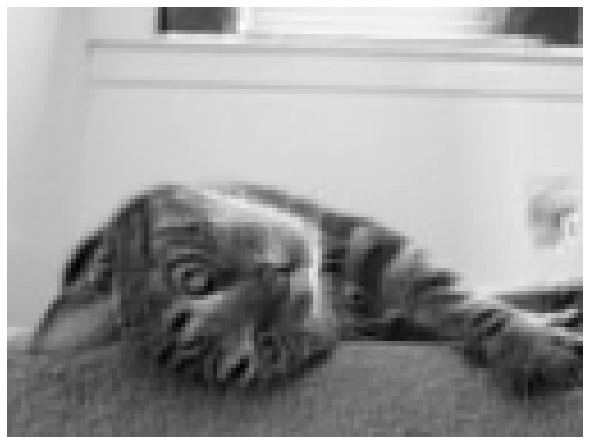

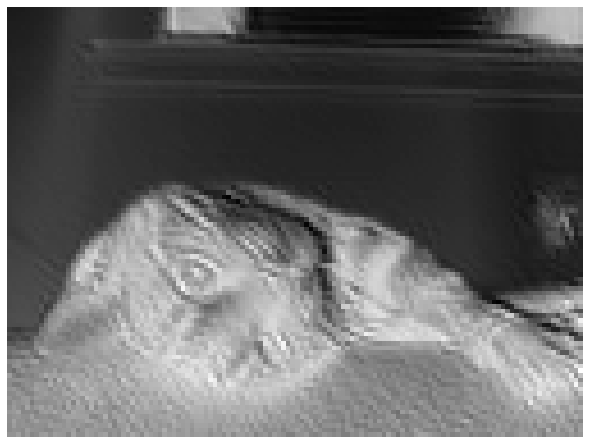

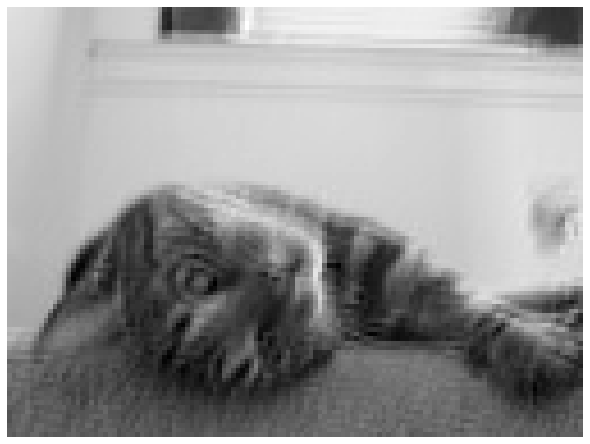

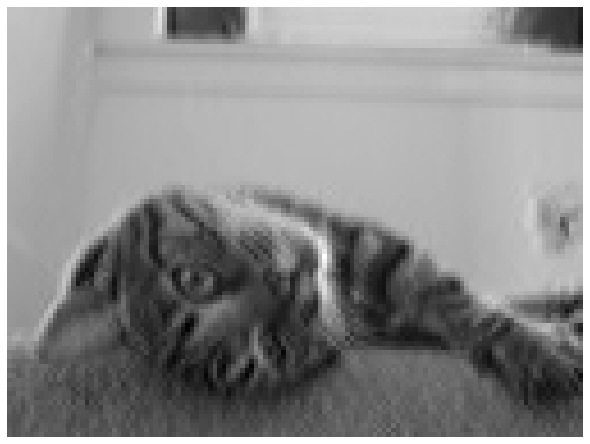

In [185]:
for i in range(4):
    fig = plt.figure(figsize=(8,8), frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.imshow(convolutions.detach().numpy()[i],cmap='gray')
    plt.savefig(f'{i}.jpg')

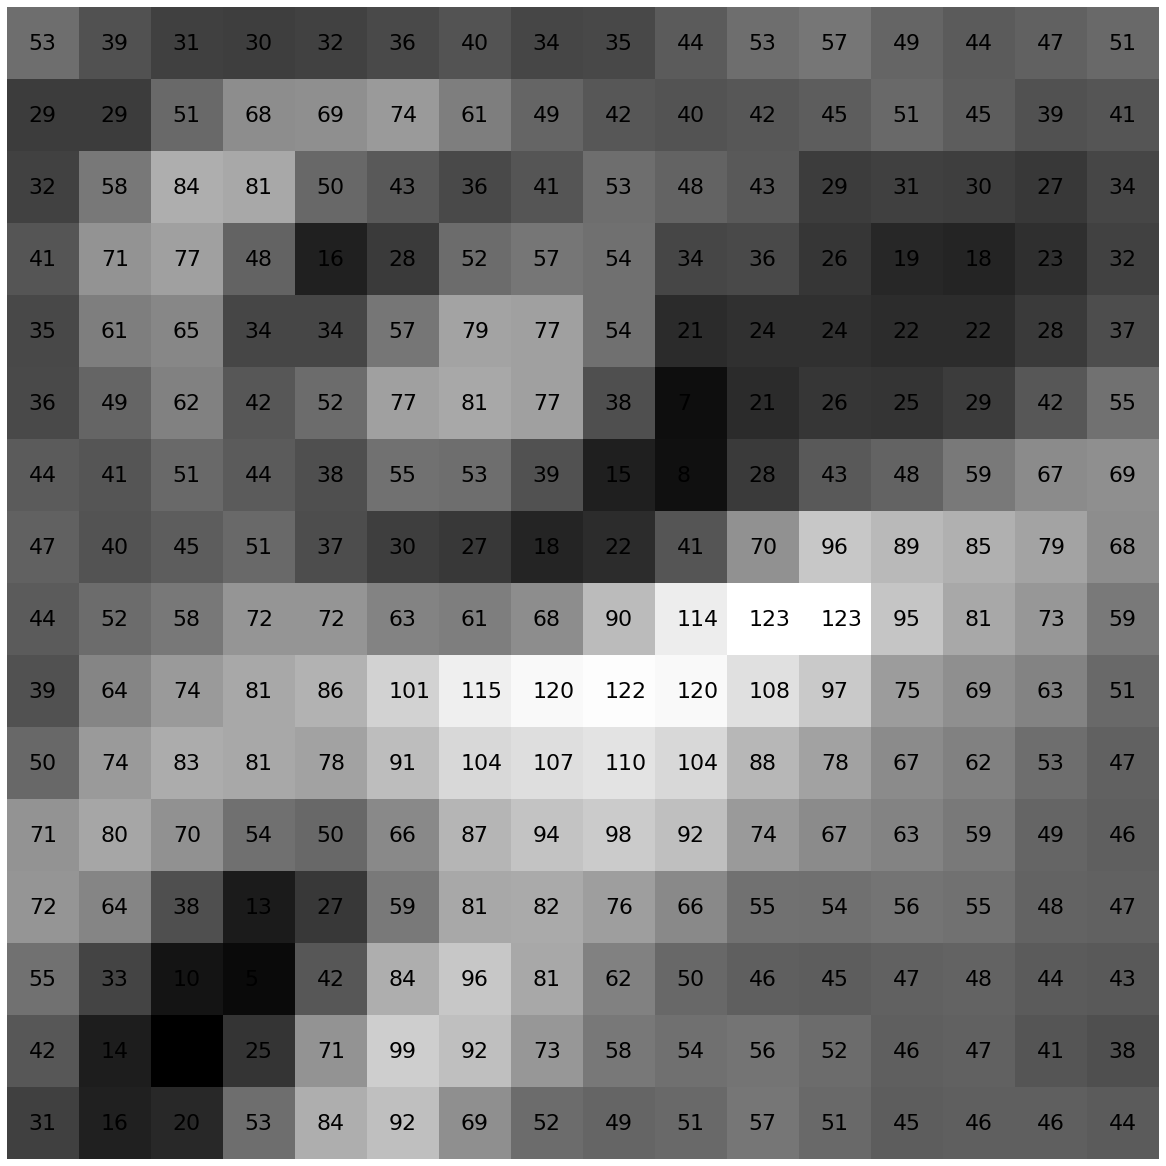

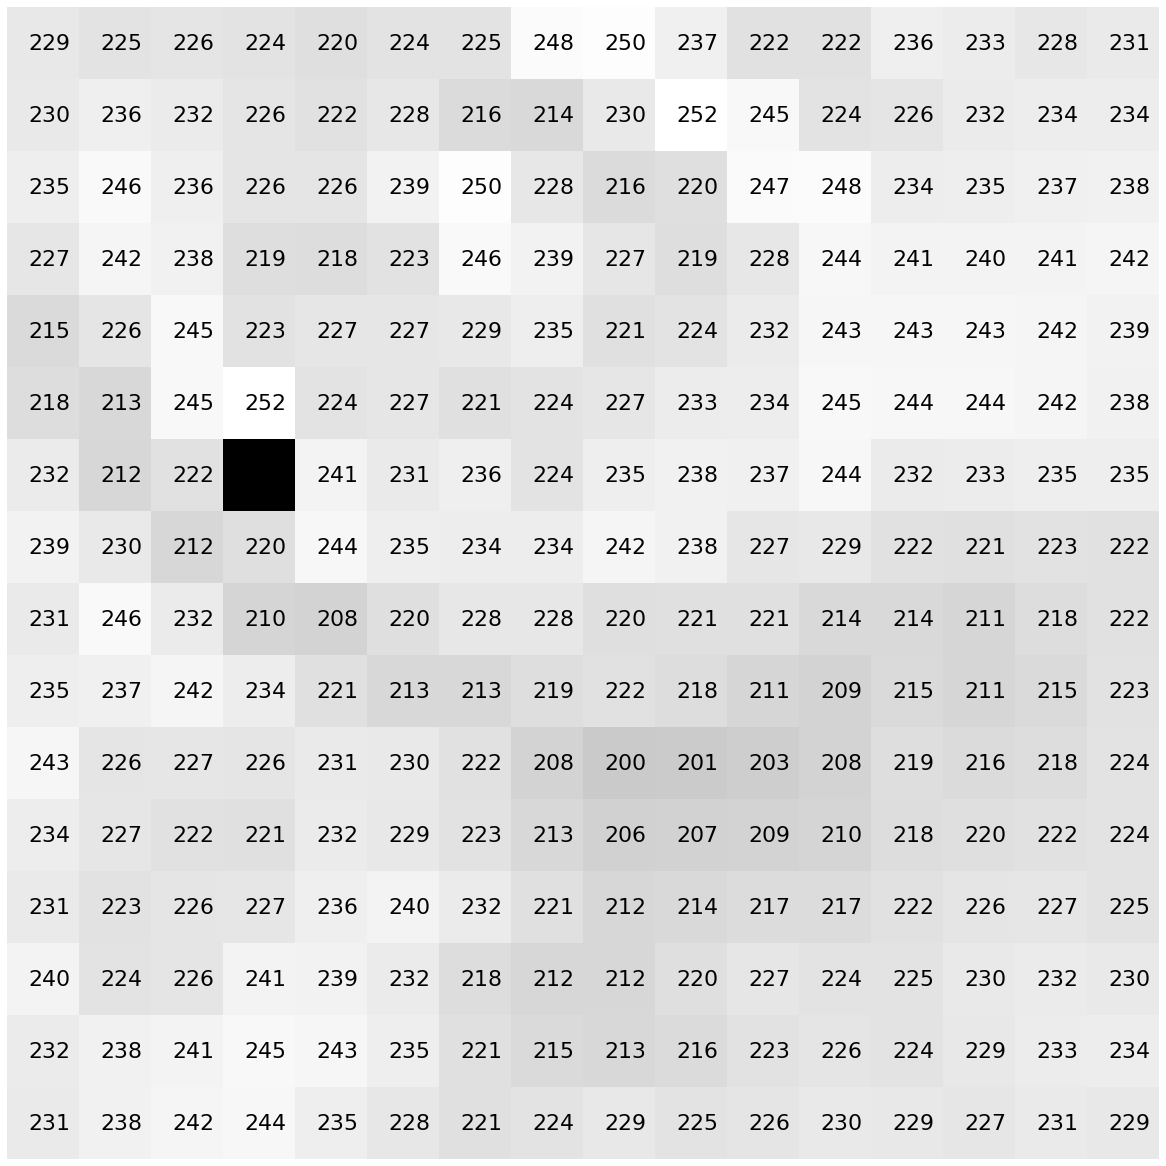

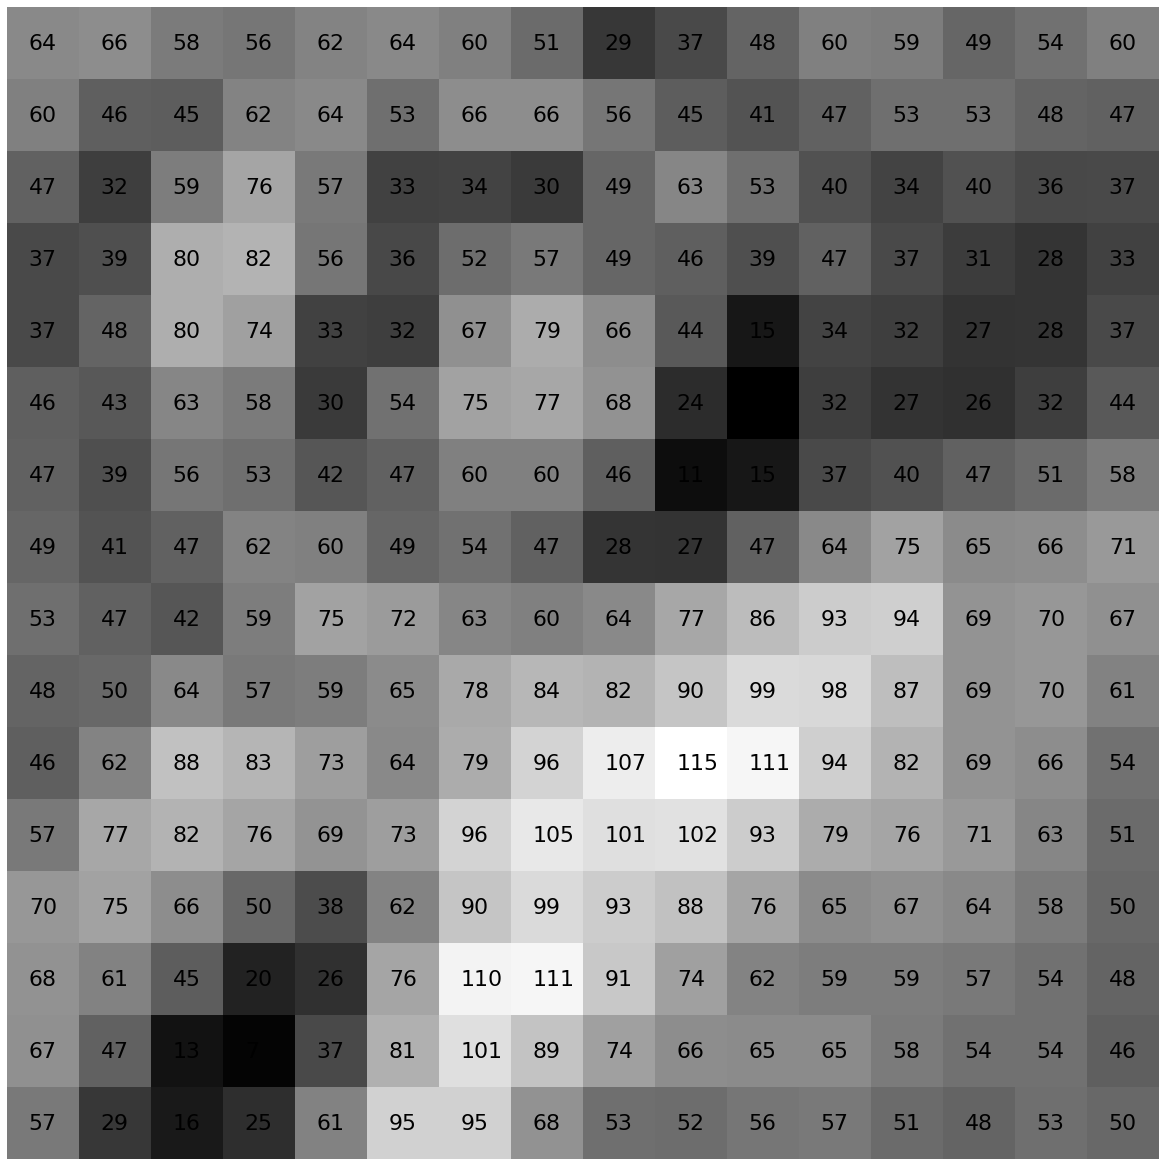

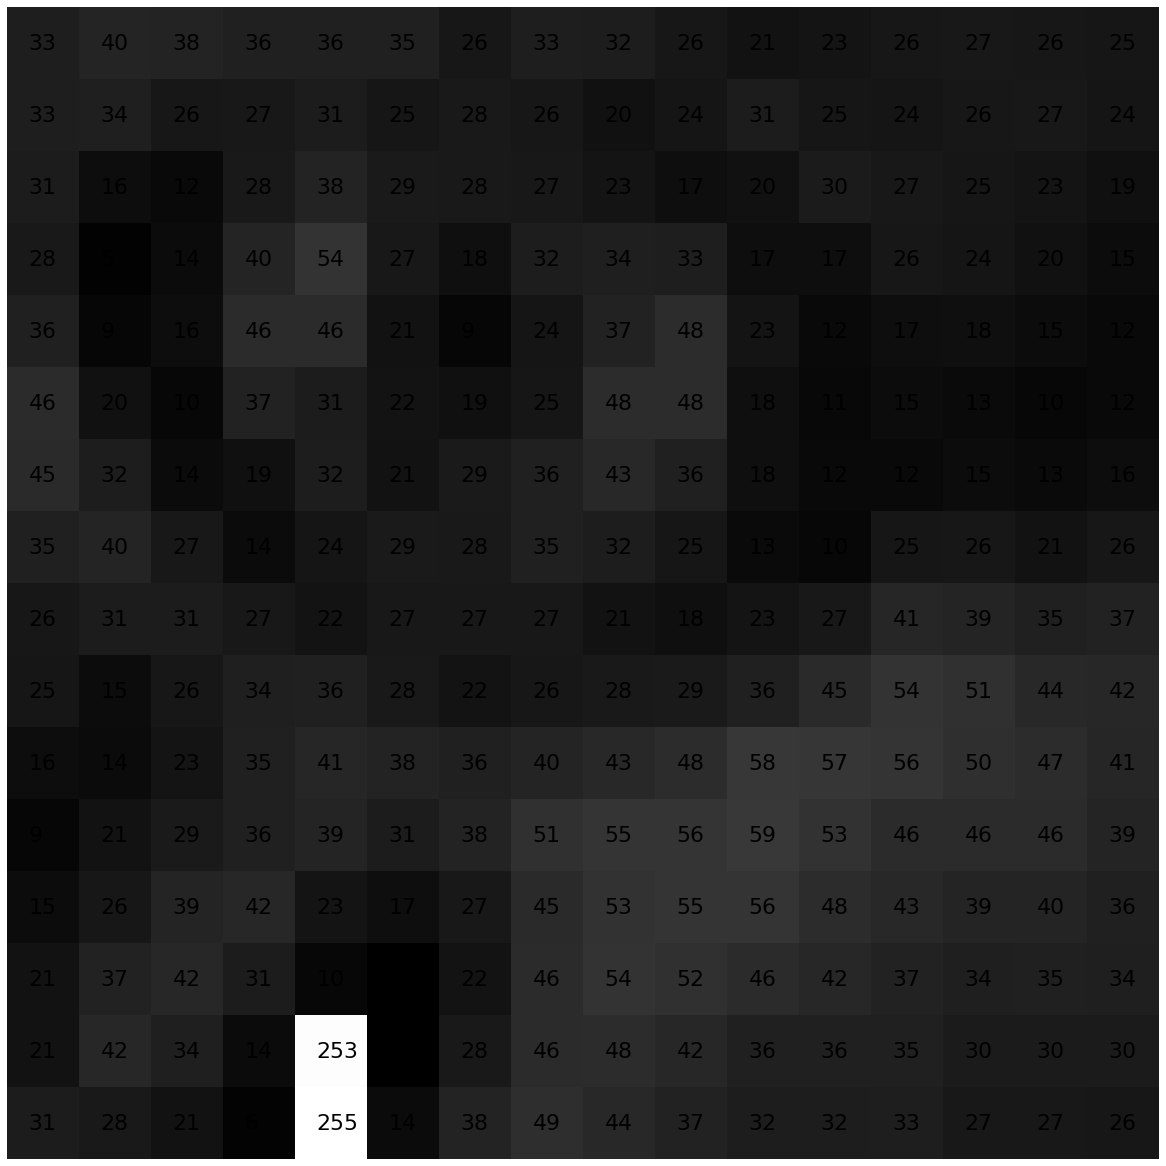

In [183]:
for i in range(4):
#     plt.figure()
#     plt.imshow(convolutions.detach().numpy()[i],cmap='gray')
    zoomed = convolutions.detach().numpy().astype(np.uint8)[i, row_offset:row_offset+16, col_offset:col_offset+16]
    fig = plt.figure(figsize=(16,16), frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.imshow(zoomed, cmap='gray')
    for y in np.arange(zoomed.shape[0]):
        for x in np.arange(zoomed.shape[1]):
            plt.text(x-0.2,y+0.1,f'{zoomed[y,x]}', size=22)
    plt.savefig(f'{i}.jpg')

In [60]:
from comms_helpers import *

In [61]:
def gen_data(num_examples, mod_order=4, sps=8, snr=50):
    
    span=8
    num_weights= sps*span+1
    hrrc = make_rrc(num_weights=num_weights, fs=sps)
    
    ints = np.random.randint(low=0, high=mod_order, size=(num_examples))
    samples = modulate(ints, M=mod_order)
    samples_pulse_shaped = pulse_shape(samples, hrrc, sps=sps)
    samples_noisy = awgn(samples_pulse_shaped, snr)
    
    return samples_noisy

In [74]:
symbols = gen_data(62, mod_order=4, sps=4)

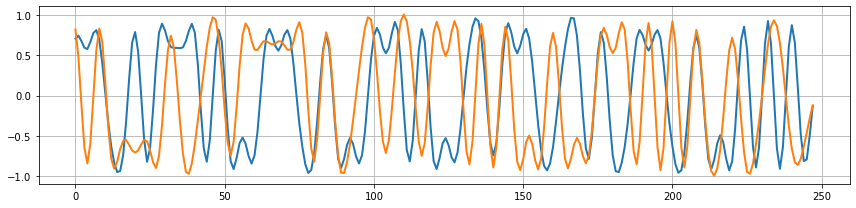

In [76]:
plt.figure(figsize=(12,3))
plt.plot(symbols.real, linewidth=2)
plt.plot(symbols.imag, linewidth=2)
plt.tight_layout()
plt.grid()
plt.savefig('qpsk_for_plotting.png')

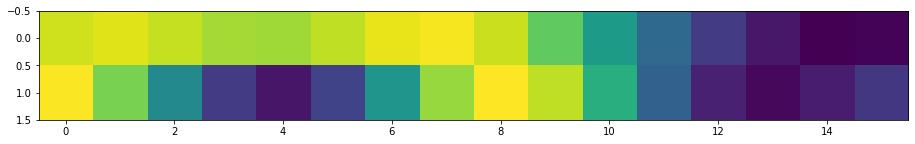

In [77]:
plt.figure(figsize=(20,2))
plt.imshow(np.vstack((symbols.real[:16],symbols.imag[:16])))

In [87]:
qpsk_offset = 120
qpsk_img = np.vstack((symbols.real[qpsk_offset:qpsk_offset+8],symbols.imag[qpsk_offset:qpsk_offset+8]))

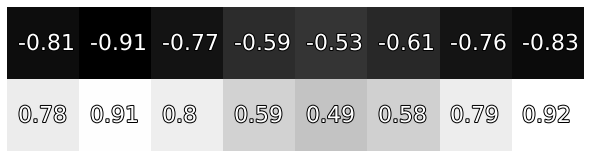

In [88]:
fig = plt.figure(figsize=(40,2), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(qpsk_img, cmap='gray')
for y in np.arange(qpsk_img.shape[0]):
    for x in np.arange(qpsk_img.shape[1]):
        txt = plt.text(x-0.35,y+0.1,f'{qpsk_img[y,x].round(decimals=2)}', size=22, color='white')
        txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='k')])
plt.savefig('qpsk_zoomin.png')

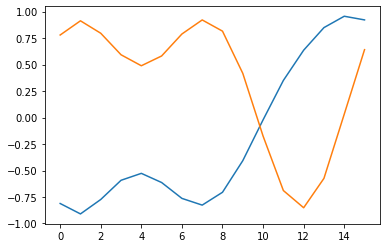

In [89]:
plt.plot(symbols.real[qpsk_offset:qpsk_offset+16])
plt.plot(symbols.imag[qpsk_offset:qpsk_offset+16])

In [268]:
conv_layer = torch.nn.Conv2d(1,4,(2,3))

In [271]:
img = np.vstack((symbols.real,symbols.imag))

In [272]:
img_tensor = torch.tensor(img, dtype=torch.float).unsqueeze(0).unsqueeze(0)

In [274]:
conv_output = conv_layer(img_tensor)

In [275]:
convolutions = conv_output.squeeze()

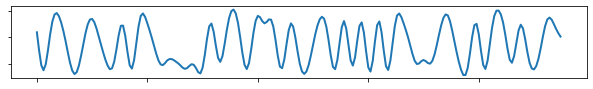

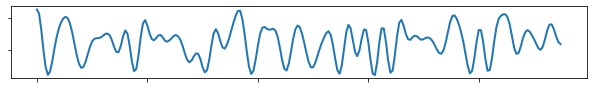

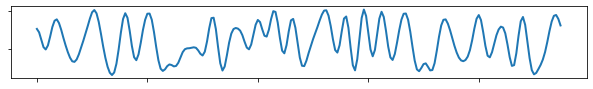

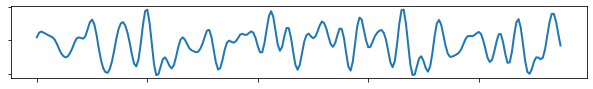

In [308]:
for i in range(4):
    fig = plt.figure(figsize=(8,1), frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
#     ax.set_axis_off()
#     fig.add_axes(ax)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    fig.add_axes(ax)
    plt.plot(convolutions.detach().numpy()[i], linewidth=2)
#     plt.xlabel(f'Feature map {i}')
#     plt.tight_layout()
    plt.savefig(f'{i}_feature_map.png', bbox_inches='tight')
#     plt.show()